In [3]:
import numpy as np
import pickle

# Specify the file path of the pickle file
file_path = "Dataset/ntu60_3danno.pkl"

# Load the data from the pickle file
with open(file_path, "rb") as f:
    data = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/ntu60_3danno.pkl'

In [8]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

1.12.1
True


In [3]:
print(f"Dataset is a dictionary which has two fields: {list(data.keys())}")
print(f"'split' is a dictionary with values : {list(data['split'].keys())}\n")

print(f"'xsub_train' size: {len(data['split']['xsub_train'])} -- 'xsub_val' size: {len(data['split']['xsub_val'])}")
print(f"'xset_train' size: {len(data['split']['xset_train'])} -- 'xset_val' size: {len(data['split']['xset_val'])}")
print(f"'xview_train' size: {len(data['split']['xview_train'])} -- 'xview_val' size: {len(data['split']['xview_val'])}")

print(f"\nSamples from Split/xsub_train :\n{data['split']['xsub_train'][:5]}")
print(f"Samples from Split/xsub_train :\n{data['split']['xview_train'][:5]}")


Dataset is a dictionary which has two fields: ['split', 'annotations']
'split' is a dictionary with values : ['xsub_train', 'xsub_val', 'xset_train', 'xset_val', 'xview_train', 'xview_val']

'xsub_train' size: 40091 -- 'xsub_val' size: 16487
'xset_train' size: 54468 -- 'xset_val' size: 59477
'xview_train' size: 37646 -- 'xview_val' size: 18932

Samples from Split/xsub_train :
['S001C001P001R001A001', 'S001C001P001R001A002', 'S001C001P001R001A003', 'S001C001P001R001A004', 'S001C001P001R001A005']
Samples from Split/xsub_train :
['S001C002P001R001A001', 'S001C002P001R001A002', 'S001C002P001R001A003', 'S001C002P001R001A004', 'S001C002P001R001A005']


In [4]:
print(f"'annotations' is a list which each element is a dictionary which contains:\n{list(data['annotations'][0].keys())}")
print(f"Annotations size: {len(data['annotations'])}\n")
print(f"'frame_dir' (str): The identifier of the corresponding video. - sample: {data['annotations'][0]['frame_dir']}")
print(f"'total_frames' (int): The number of frames in this video. - sample: {data['annotations'][0]['total_frames']}")
print(f"'label' (int): The action label. - sample: {data['annotations'][0]['label']}")
print(f"'keypoint' (np.ndarray), with shape [M x T x V x C]): The keypoint annotation. M: number of persons; T: number of frames,\n\t   V: number of keypoints, C: number of dimensions for keypoint coordinates. - sample shape: {data['annotations'][0]['keypoint'].shape}")


'annotations' is a list which each element is a dictionary which contains:
['frame_dir', 'label', 'keypoint', 'total_frames']
Annotations size: 56578

'frame_dir' (str): The identifier of the corresponding video. - sample: S001C001P001R001A001
'total_frames' (int): The number of frames in this video. - sample: 103
'label' (int): The action label. - sample: 0
'keypoint' (np.ndarray), with shape [M x T x V x C]): The keypoint annotation. M: number of persons; T: number of frames,
	   V: number of keypoints, C: number of dimensions for keypoint coordinates. - sample shape: (1, 103, 25, 3)


In [5]:
print(f"Sample from the first frame: ")
data['annotations'][0]['keypoint'][0][0]

Sample from the first frame: 


array([[ 0.2181,  0.1726,  3.785 ],
       [ 0.2323,  0.4326,  3.715 ],
       [ 0.2457,  0.6875,  3.635 ],
       [ 0.2129,  0.808 ,  3.582 ],
       [ 0.1109,  0.6113,  3.717 ],
       [ 0.1009,  0.4287,  3.742 ],
       [ 0.1187,  0.3428,  3.557 ],
       [ 0.1165,  0.3174,  3.55  ],
       [ 0.345 ,  0.574 ,  3.588 ],
       [ 0.4211,  0.3848,  3.627 ],
       [ 0.1919,  0.3188,  3.541 ],
       [ 0.1299,  0.3171,  3.543 ],
       [ 0.1627,  0.1746,  3.78  ],
       [ 0.1975, -0.1361,  3.904 ],
       [ 0.2443, -0.4202,  4.055 ],
       [ 0.204 , -0.4763,  4.094 ],
       [ 0.27  ,  0.1678,  3.73  ],
       [ 0.3105, -0.1462,  3.818 ],
       [ 0.3428, -0.433 ,  3.943 ],
       [ 0.2952, -0.502 ,  3.969 ],
       [ 0.2426,  0.6245,  3.656 ],
       [ 0.12  ,  0.2957,  3.533 ],
       [ 0.099 ,  0.346 ,  3.527 ],
       [ 0.0871,  0.2988,  3.547 ],
       [ 0.1268,  0.2815,  3.549 ]], dtype=float16)

In [9]:
action_classes = [
    'drink water', 'eat meal/snack', 'brushing teeth', 'brushing hair', 'drop', 'pickup', 'throw', 'sitting down',
    'standing up (from sitting position)', 'clapping', 'reading', 'writing', 'tear up paper', 'wear jacket',
    'take off jacket', 'wear a shoe', 'take off a shoe', 'wear on glasses', 'take off glasses', 'put on a hat/cap',
    'take off a hat/cap', 'cheer up', 'hand waving', 'kicking something', 'reach into pocket', 'hopping (one foot jumping)',
    'jump up', 'make a phone call/answer phone', 'playing with phone/tablet', 'typing on a keyboard',
    'pointing to something with finger', 'taking a selfie', 'check time (from watch)', 'rub two hands together',
    'nod head/bow', 'shake head', 'wipe face', 'salute', 'put palms together', 'cross hands in front',
    'sneeze/cough', 'staggering', 'falling', 'touch head (headache)', 'touch chest (stomachache/heart pain)',
    'touch back (backache)', 'touch neck (neckache)', 'nausea or vomiting condition', 'use a fan (with hand or paper)/feeling warm',
    'punching/slapping other person', 'kicking other person', 'pushing other person', 'pat on back of other person',
    'point finger at the other person', 'hugging other person', 'giving something to other person', 'touch other person\'s pocket',
    'handshaking', 'walking towards each other', 'walking apart from each other'
]

idx_to_class = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
    23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
    44, 45, 46, 47, 48, 49, 50,  51, 52, 53, 54, 55, 56, 57, 58, 59, 60
]
random_idx = np.random.randint(1,len(idx_to_class)) 
print(f"{(idx_to_class[random_idx], action_classes[random_idx])}")

(7, 'throw')


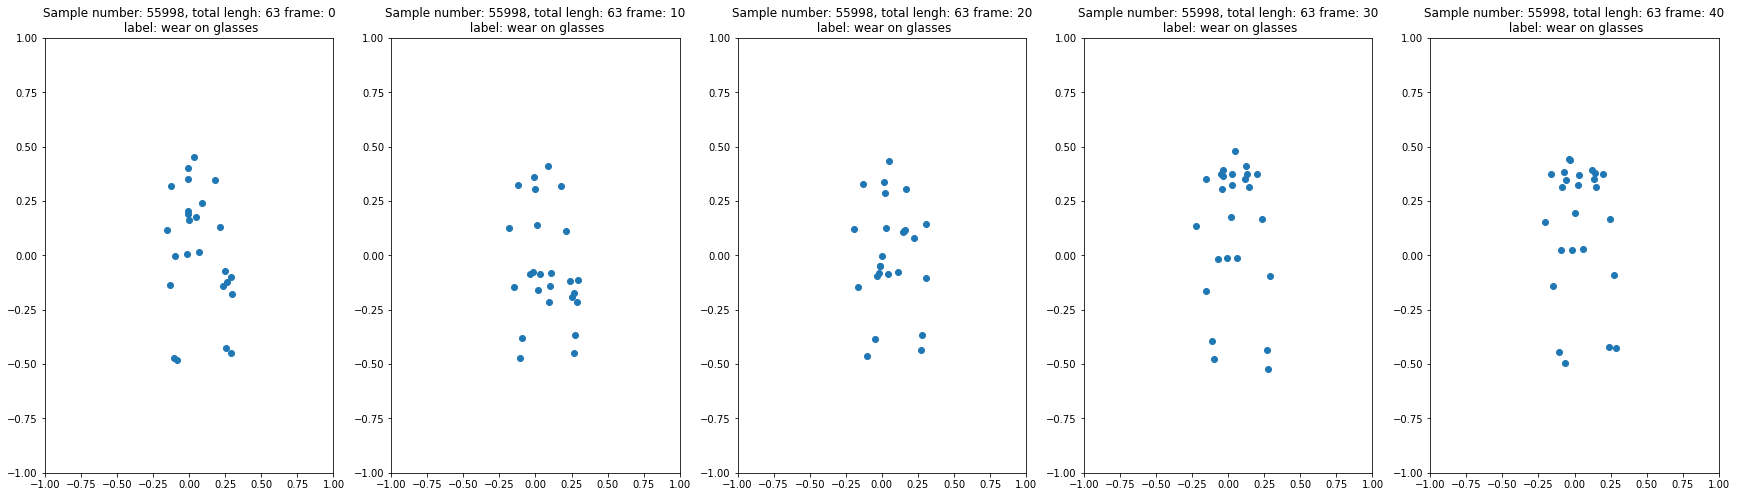

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,8))
plt_idx = 1
num_frames = 50
random_sample = np.random.randint(len(data['annotations'])) # erros: empty samples/various scale/! (e.g 43627/25039)
for i in range(0,num_frames,int(num_frames/5)):
    x = data['annotations'][random_sample]['keypoint'][0][i][:, 0]
    y = data['annotations'][random_sample]['keypoint'][0][i][:, 1]
    action_label = action_classes[data['annotations'][random_sample]['label']]
    plt.subplot(1,5,plt_idx)
    #plt.xlim(-0.4,0.8)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    
    plt.scatter(x, y)
    plt.title(f"Sample number: {random_sample}, total lengh: {data['annotations'][random_sample]['total_frames']} frame: {i}\n label: {action_label}")
    plt_idx += 1


In [17]:
(x,y)

(array([-1.794, -1.808, -1.815, -1.771, -1.885, -1.909, -1.752, -1.737,
        -1.728, -1.705, -1.626, -1.638, -1.818, -1.739, -1.967, -1.861,
        -1.738, -1.718, -1.813, -1.783, -1.814, -1.699, -1.786, -1.617,
        -1.665], dtype=float16),
 array([-0.0774 ,  0.2053 ,  0.4822 ,  0.597  ,  0.3599 ,  0.11414,
        -0.1495 , -0.209  ,  0.405  ,  0.1143 , -0.1482 , -0.1458 ,
        -0.0843 , -0.455  , -0.791  , -0.847  , -0.0691 , -0.4556 ,
        -0.8506 , -0.944  ,  0.4138 , -0.2695 , -0.2378 , -0.2003 ,
        -0.132  ], dtype=float16))

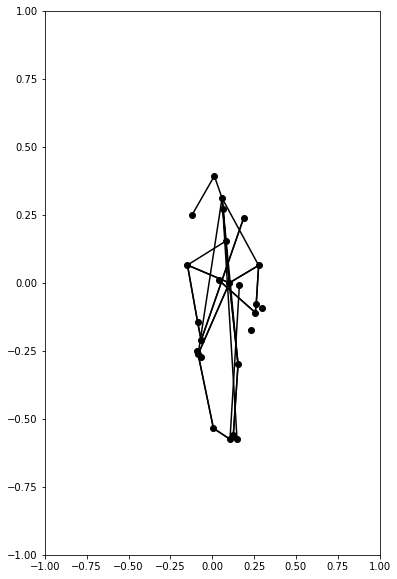

In [13]:
# call the function to plot the skeleton
plot_skeleton(x, y)


In [12]:
import matplotlib.pyplot as plt

def plot_skeleton(x_coords, y_coords):
    # define connections between joints
    connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),  # Spine
    (0, 5), (5, 6), (6, 7), (7, 8),  # Left leg
    (0, 9), (9, 10), (10, 11), (11, 12),  # Right leg
    (0, 13), (13, 14), (14, 15), (15, 16),  # Left arm
    (0, 17), (17, 18), (18, 19), (19, 20),  # Right arm
    (1, 5), (2, 9), (5, 6), (9, 10), (6, 7), (10, 11), (7, 8), (11, 12),  # Spine and legs
    (1, 2), (2, 17), (2, 13), (17, 18), (13, 14), (14, 15),  # Spine and arms
    (1, 0), (2, 0), (17, 0), (13, 0), (5, 0), (9, 0),  # Spine and neck/head
]

    # plot the joints
    plt.figure(figsize=(6,10))
    plt.scatter(x_coords, y_coords, color='black')
    
    # plot the connections between the joints
    for i,j in connections:
        plt.plot([x_coords[i], x_coords[j]], [y_coords[i], y_coords[j]], color='black')
    
    # set plot limits
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    
    # show plot
    plt.show()

## Using `pyskl` tools

In [1]:
import cv2
import decord
import io
import matplotlib.pyplot as plt
import moviepy.editor as mpy
import numpy as np
from mmcv import load
from tqdm import tqdm

In [ ]:
class PreNormalize3D:
    """PreNormalize for NTURGB+D 3D keypoints (x, y, z). Codes adapted from https://github.com/lshiwjx/2s-AGCN. """

    def unit_vector(self, vector):
        """Returns the unit vector of the vector. """
        return vector / np.linalg.norm(vector)

    def angle_between(self, v1, v2):
        """Returns the angle in radians between vectors 'v1' and 'v2'. """
        if np.abs(v1).sum() < 1e-6 or np.abs(v2).sum() < 1e-6:
            return 0
        v1_u = self.unit_vector(v1)
        v2_u = self.unit_vector(v2)
        return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

    def rotation_matrix(self, axis, theta):
        """Return the rotation matrix associated with counterclockwise rotation
        about the given axis by theta radians."""
        if np.abs(axis).sum() < 1e-6 or np.abs(theta) < 1e-6:
            return np.eye(3)
        axis = np.asarray(axis)
        axis = axis / np.sqrt(np.dot(axis, axis))
        a = np.cos(theta / 2.0)
        b, c, d = -axis * np.sin(theta / 2.0)
        aa, bb, cc, dd = a * a, b * b, c * c, d * d
        bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
        return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                        [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                        [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

    def __init__(self, zaxis=[0, 1], xaxis=[8, 4], align_spine=True, align_center=True):
        self.zaxis = zaxis
        self.xaxis = xaxis
        self.align_spine = align_spine
        self.align_center = align_center

    def __call__(self, results):
        skeleton = results['keypoint']
        total_frames = results.get('total_frames', skeleton.shape[1])

        M, T, V, C = skeleton.shape
        assert T == total_frames
        if skeleton.sum() == 0:
            return results

        index0 = [i for i in range(T) if not np.all(np.isclose(skeleton[0, i], 0))]

        assert M in [1, 2]
        if M == 2:
            index1 = [i for i in range(T) if not np.all(np.isclose(skeleton[1, i], 0))]
            if len(index0) < len(index1):
                skeleton = skeleton[:, np.array(index1)]
                skeleton = skeleton[[1, 0]]
            else:
                skeleton = skeleton[:, np.array(index0)]
        else:
            skeleton = skeleton[:, np.array(index0)]

        T_new = skeleton.shape[1]

        if self.align_center:
            if skeleton.shape[2] == 25:
                main_body_center = skeleton[0, 0, 1].copy()
            else:
                main_body_center = skeleton[0, 0, -1].copy()
            mask = ((skeleton != 0).sum(-1) > 0)[..., None]
            skeleton = (skeleton - main_body_center) * mask

        if self.align_spine:
            joint_bottom = skeleton[0, 0, self.zaxis[0]]
            joint_top = skeleton[0, 0, self.zaxis[1]]
            axis = np.cross(joint_top - joint_bottom, [0, 0, 1])
            angle = self.angle_between(joint_top - joint_bottom, [0, 0, 1])
            matrix_z = self.rotation_matrix(axis, angle)
            skeleton = np.einsum('abcd,kd->abck', skeleton, matrix_z)

            joint_rshoulder = skeleton[0, 0, self.xaxis[0]]
            joint_lshoulder = skeleton[0, 0, self.xaxis[1]]
            axis = np.cross(joint_rshoulder - joint_lshoulder, [1, 0, 0])
            angle = self.angle_between(joint_rshoulder - joint_lshoulder, [1, 0, 0])
            matrix_x = self.rotation_matrix(axis, angle)
            skeleton = np.einsum('abcd,kd->abck', skeleton, matrix_x)

        results['keypoint'] = skeleton
        results['total_frames'] = T_new
        results['body_center'] = main_body_center
        return results



In [2]:

class Vis3DPose:

    def __init__(self, item, layout='nturgb+d', fps=12, angle=(30, 45), fig_size=(8, 8), dpi=80):
        kp = item['keypoint']
        self.kp = kp
        assert self.kp.shape[-1] == 3
        self.layout = layout
        self.fps = fps
        self.angle = angle  # For 3D data only
        self.colors = ('#3498db', '#000000', '#e74c3c')  # l, m, r
        self.fig_size = fig_size
        self.dpi = dpi

        assert layout == 'nturgb+d'
        if self.layout == 'nturgb+d':
            self.num_joint = 25
            self.links = np.array([
                (1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
                (7, 6), (8, 7), (9, 21), (10, 9), (11, 10), (12, 11),
                (13, 1), (14, 13), (15, 14), (16, 15), (17, 1), (18, 17),
                (19, 18), (20, 19), (22, 8), (23, 8), (24, 12), (25, 12)], dtype=np.int) - 1
            self.left = np.array([5, 6, 7, 8, 13, 14, 15, 16, 22, 23], dtype=np.int) - 1
            self.right = np.array([9, 10, 11, 12, 17, 18, 19, 20, 24, 25], dtype=np.int) - 1
            self.num_link = len(self.links)
        self.limb_tag = [1] * self.num_link

        for i, link in enumerate(self.links):
            if link[0] in self.left or link[1] in self.left:
                self.limb_tag[i] = 0
            elif link[0] in self.right or link[1] in self.right:
                self.limb_tag[i] = 2

        assert len(kp.shape) == 4 and kp.shape[3] == 3 and kp.shape[2] == self.num_joint
        x, y, z = kp[..., 0], kp[..., 1], kp[..., 2]

        min_x, max_x = min(x[x != 0]), max(x[x != 0])
        min_y, max_y = min(y[y != 0]), max(y[y != 0])
        min_z, max_z = min(z[z != 0]), max(z[z != 0])
        max_axis = max(max_x - min_x, max_y - min_y, max_z - min_z)
        mid_x, mid_y, mid_z = (min_x + max_x) / 2, (min_y + max_y) / 2, (min_z + max_z) / 2
        self.min_x, self.max_x = mid_x - max_axis / 2, mid_x + max_axis / 2
        self.min_y, self.max_y = mid_y - max_axis / 2, mid_y + max_axis / 2
        self.min_z, self.max_z = mid_z - max_axis / 2, mid_z + max_axis / 2

        self.images = []

    def get_img(self, dpi=80):
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=dpi)
        buf.seek(0)
        img = np.frombuffer(buf.getvalue(), dtype=np.uint8)
        buf.close()
        return cv2.imdecode(img, -1)

    def vis(self):
        self.images = []
        plt.figure(figsize=self.fig_size)
        for t in range(self.kp.shape[1]):
            ax = plt.gca(projection='3d')
            ax.set_xlim3d([self.min_x, self.max_x])
            ax.set_ylim3d([self.min_y, self.max_y])
            ax.set_zlim3d([self.min_z, self.max_z])
            ax.view_init(*self.angle)
            ax.set_aspect('auto')
            for i in range(self.num_link):
                for m in range(self.kp.shape[0]):
                    link = self.links[i]
                    color = self.colors[self.limb_tag[i]]
                    j1, j2 = self.kp[m, t, link[0]], self.kp[m, t, link[1]]
                    if not ((np.allclose(j1, 0) or np.allclose(j2, 0)) and link[0] != 1 and link[1] != 1):
                        ax.plot([j1[0], j2[0]], [j1[1], j2[1]], [j1[2], j2[2]], lw=1, c=color)
            self.images.append(self.get_img(dpi=self.dpi))
            ax.cla()
        return mpy.ImageSequenceClip(self.images, fps=self.fps)


In [ ]:
# Specify the file path of the pickle file
file_path = "Dataset/ntu60_3danno.pkl"
data = load(file_path)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


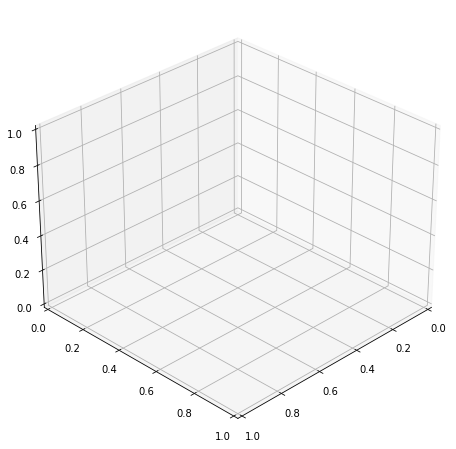

In [14]:
idx = 0

sample_data = data['annotations'][random_sample]
vid = Vis3DPose(sample_data, layout='nturgb+d', fps=12, angle=(30, 45), fig_size=(8, 8), dpi=80)
vid = vid.vis()
vid.ipython_display()